In [1]:
from static_plot import static_track_temp, static_track_conditions
from driver_comparisons import  main, plot_driver_speed_change, get_driver_lap_comparison,fastest_laptimes, fastest_lap_comparison, driver_gear_changes, get_driver_aws_data

In [2]:
from matplotlib import pyplot
import datetime as dt
import matplotlib.animation as animation
from random import randint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from pandas import read_csv

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection

import numpy as np

import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from timple.timedelta import strftimedelta

In [3]:
silverstone_p1 = main(2022, "British", "Practice 1")

core           INFO 	Loading data for British Grand Prix - Practice 1 [v2.2.4]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [4]:
silverstone_p1.weather_data['TrackTemp']




0     26.8
1     26.7
2     26.8
3     26.9
4     26.6
      ... 
72    26.4
73    25.2
74    24.8
75    24.6
76    24.4
Name: TrackTemp, Length: 77, dtype: float64

Text(0, 0.5, 'Temperature (*C)')

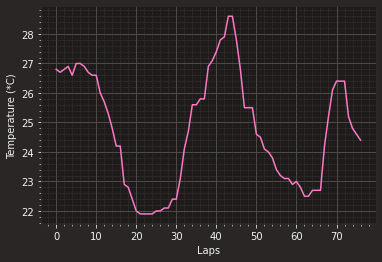

In [5]:

# create the figure and axis objects
fig, ax = plt.subplots()
# plot the data and customize
ax.plot(silverstone_p1.weather_data['TrackTemp'])
ax.set_xlabel('Laps')
ax.set_ylabel('Temperature (*C)')


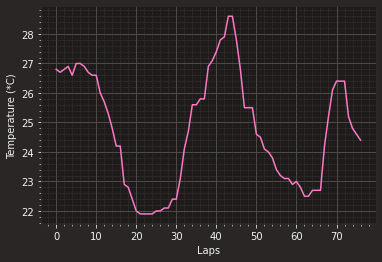

In [6]:
static_track_temp(silverstone_p1)

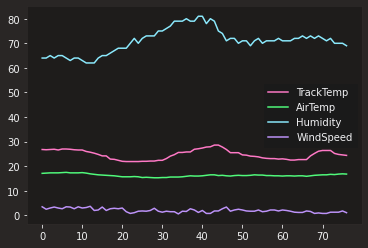

In [7]:
static_track_conditions(silverstone_p1)

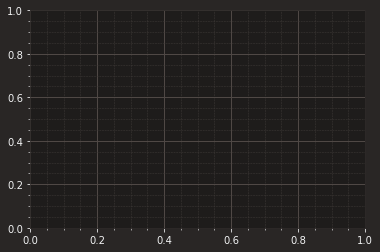

In [8]:
# animated_line_plot.py

# create empty lists for the x and y data
x = []
y = []

# create the figure and axes objects
fig, ax = plt.subplots()

# function that draws each frame of the animation
def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])
# run the animation
ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show()


In [9]:
silverstone_weather_df = silverstone_p1.weather_data
silverstone_weather_df


,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:40.904000,17.1,64.0,998.4,False,26.8,236,3.5
1,0 days 00:01:40.900000,17.2,64.0,998.4,False,26.7,240,2.5
2,0 days 00:02:40.899000,17.3,65.0,998.4,False,26.8,239,3.0
3,0 days 00:03:40.907000,17.3,64.0,998.2,False,26.9,230,3.4
4,0 days 00:04:40.904000,17.3,65.0,998.4,False,26.6,242,3.0
...,...,...,...,...,...,...,...,...
72,0 days 01:12:41.057000,16.7,72.0,998.4,False,26.4,240,1.3
73,0 days 01:13:41.063000,16.6,70.0,998.4,False,25.2,221,1.3
74,0 days 01:14:41.056000,16.8,70.0,998.4,True,24.8,267,1.3
75,0 days 01:15:41.058000,16.9,70.0,998.4,True,24.6,263,1.8


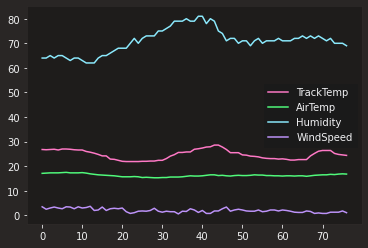

In [10]:
silverstone_tracktemp = silverstone_weather_df[['TrackTemp',"AirTemp","Humidity","WindSpeed"]]


silverstone_tracktemp.plot()
pyplot.show()

In [11]:
df_silverstone_p1= silverstone_p1.laps
df_silverstone_p1 = df_silverstone_p1[df_silverstone_p1["LapTime"].notna()]
df_silverstone_p1.sort_values(["LapTime"])


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
78,0 days 01:10:44.201000,77,0 days 00:01:42.249000,7,2,NaT,NaT,0 days 00:00:31.976000,0 days 00:00:42.285000,0 days 00:00:27.988000,...,True,INTERMEDIATE,8.0,False,0 days 01:09:01.952000,Alfa Romeo,BOT,1,True,2022-07-01 12:54:01.960
22,0 days 01:13:46.254000,44,0 days 00:01:42.781000,9,4,NaT,NaT,0 days 00:00:29.370000,0 days 00:00:47.322000,0 days 00:00:26.089000,...,True,SOFT,NaN,True,0 days 01:12:03.473000,Mercedes,HAM,2,True,2022-07-01 12:57:03.481
6,0 days 00:34:06.466000,55,0 days 00:01:42.967000,4,2,NaT,NaT,0 days 00:00:32.629000,0 days 00:00:42.346000,0 days 00:00:27.992000,...,True,INTERMEDIATE,5.0,False,0 days 00:32:23.499000,Ferrari,SAI,1,True,2022-07-01 12:17:23.507
75,0 days 00:42:14.769000,77,0 days 00:01:43.437000,4,1,NaT,NaT,0 days 00:00:32.447000,0 days 00:00:42.861000,0 days 00:00:28.129000,...,False,INTERMEDIATE,4.0,True,0 days 00:40:31.332000,Alfa Romeo,BOT,1,True,2022-07-01 12:25:31.340
45,0 days 00:21:22.480000,16,0 days 00:01:43.801000,3,1,NaT,NaT,0 days 00:00:32.730000,0 days 00:00:42.793000,0 days 00:00:28.278000,...,True,INTERMEDIATE,3.0,True,0 days 00:19:38.679000,Ferrari,LEC,1,True,2022-07-01 12:04:38.687
12,0 days 00:43:49.426000,47,0 days 00:01:43.895000,2,1,NaT,NaT,0 days 00:00:32.180000,0 days 00:00:43.123000,0 days 00:00:28.592000,...,True,INTERMEDIATE,2.0,True,0 days 00:42:05.531000,Haas F1 Team,MSC,1,True,2022-07-01 12:27:05.539
64,0 days 00:33:45.754000,4,0 days 00:01:44.337000,2,2,NaT,0 days 00:33:39.723000,0 days 00:00:32.985000,0 days 00:00:43.210000,0 days 00:00:28.142000,...,False,INTERMEDIATE,1.0,True,0 days 00:32:01.417000,McLaren,NOR,1,False,2022-07-01 12:17:01.425
44,0 days 00:19:38.679000,16,0 days 00:01:44.769000,2,1,NaT,NaT,0 days 00:00:33.175000,0 days 00:00:43.592000,0 days 00:00:28.002000,...,False,INTERMEDIATE,2.0,True,0 days 00:17:53.910000,Ferrari,LEC,1,True,2022-07-01 12:02:53.918
21,0 days 01:12:03.473000,44,0 days 00:01:44.798000,8,4,NaT,NaT,0 days 00:00:29.808000,0 days 00:00:49.418000,0 days 00:00:25.572000,...,False,SOFT,NaN,True,0 days 01:10:18.675000,Mercedes,HAM,1,True,2022-07-01 12:55:18.683
73,0 days 00:38:20.828000,77,0 days 00:01:46.056000,2,1,NaT,NaT,0 days 00:00:33.593000,0 days 00:00:43.818000,0 days 00:00:28.645000,...,False,INTERMEDIATE,2.0,True,0 days 00:36:34.772000,Alfa Romeo,BOT,1,True,2022-07-01 12:21:34.780


In [12]:
df_silverstone_p1.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'Team', 'Driver',
       'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')

In [13]:
silverstone_p2 = main(2022, "British", "FP2")

core           INFO 	Loading data for British Grand Prix - Practice 2 [v2.2.4]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [14]:
def sort_fastest_practice_time(session):
    df_silverstone_p= session.laps
    df_silverstone_p = df_silverstone_p[df_silverstone_p["LapTime"].notna()]
    df_silverstone_p = df_silverstone_p.sort_values(["LapTime"])
    return(df_silverstone_p)

In [15]:
sort_fastest_practice_time(silverstone_p2).head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
33,0 days 00:51:39.619000,55,0 days 00:01:28.942000,16,3,NaT,NaT,0 days 00:00:28.439000,0 days 00:00:36.209000,0 days 00:00:24.294000,...,True,SOFT,6.0,False,0 days 00:50:10.677000,Ferrari,SAI,1,True,2022-07-01 15:35:10.688
30,0 days 00:45:36.123000,55,0 days 00:01:29.014000,13,2,NaT,NaT,0 days 00:00:28.509000,0 days 00:00:36.084000,0 days 00:00:24.421000,...,False,SOFT,NaN,True,0 days 00:44:07.109000,Ferrari,SAI,1,True,2022-07-01 15:29:07.120
86,0 days 00:58:36.722000,44,0 days 00:01:29.105000,12,2,NaT,NaT,0 days 00:00:28.702000,0 days 00:00:36.044000,0 days 00:00:24.359000,...,True,SOFT,NaN,True,0 days 00:57:07.617000,Mercedes,HAM,1,True,2022-07-01 15:42:07.628
369,0 days 00:43:04.468000,4,0 days 00:01:29.118000,12,2,NaT,NaT,0 days 00:00:28.481000,0 days 00:00:36.173000,0 days 00:00:24.464000,...,True,SOFT,3.0,True,0 days 00:41:35.350000,McLaren,NOR,1,True,2022-07-01 15:26:35.361
9,0 days 00:57:44.123000,1,0 days 00:01:29.149000,10,2,NaT,NaT,0 days 00:00:28.599000,0 days 00:00:36.105000,0 days 00:00:24.445000,...,True,SOFT,3.0,True,0 days 00:56:14.974000,Red Bull Racing,VER,1,True,2022-07-01 15:41:14.985


['VER' 'SAI' 'MSC' 'HAM' 'OCO' 'ZHO' 'ALB' 'TSU' 'MAG' 'STR' 'LEC' 'ALO'
 'PER' 'GAS' 'LAT' 'VET' 'NOR' 'RIC' 'RUS' 'BOT']


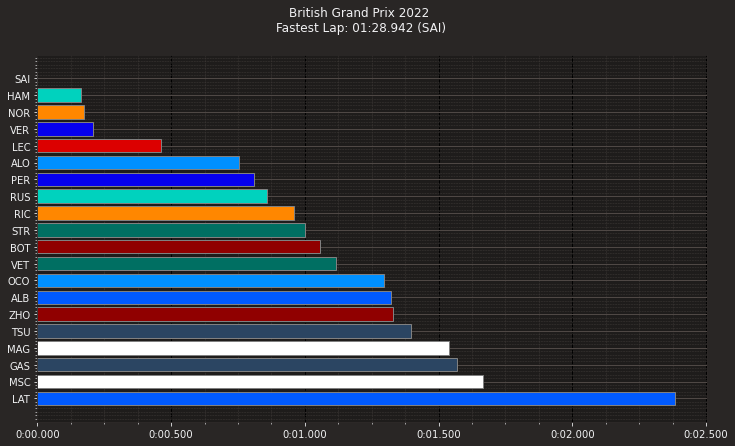

In [16]:
fastest_laptimes(silverstone_p2)

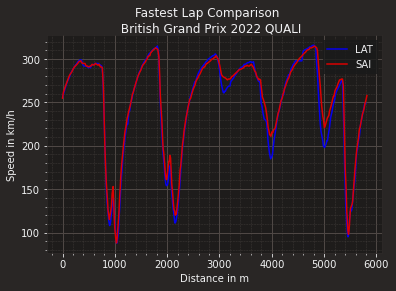

In [17]:
fastest_lap_comparison("LAT","SAI", silverstone_p2)

In [18]:
carlo_GP = silverstone_p2.laps.pick_driver('SAI')

carlo_GP = carlo_GP.sort_values(by=["LapTime"], ascending=True)
carlo_GP


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
33,0 days 00:51:39.619000,55,0 days 00:01:28.942000,16,3,NaT,NaT,0 days 00:00:28.439000,0 days 00:00:36.209000,0 days 00:00:24.294000,...,True,SOFT,6.0,False,0 days 00:50:10.677000,Ferrari,SAI,1,True,2022-07-01 15:35:10.688
30,0 days 00:45:36.123000,55,0 days 00:01:29.014000,13,2,NaT,NaT,0 days 00:00:28.509000,0 days 00:00:36.084000,0 days 00:00:24.421000,...,False,SOFT,NaN,True,0 days 00:44:07.109000,Ferrari,SAI,1,True,2022-07-01 15:29:07.120
27,0 days 00:33:03.435000,55,0 days 00:01:29.543000,10,1,NaT,NaT,0 days 00:00:28.932000,0 days 00:00:36.194000,0 days 00:00:24.417000,...,False,MEDIUM,10.0,True,0 days 00:31:33.892000,Ferrari,SAI,1,True,2022-07-01 15:16:33.903
22,0 days 00:23:40.157000,55,0 days 00:01:29.962000,5,1,NaT,NaT,0 days 00:00:28.862000,0 days 00:00:36.554000,0 days 00:00:24.546000,...,False,MEDIUM,5.0,True,0 days 00:22:10.195000,Ferrari,SAI,1,True,2022-07-01 15:07:10.206
20,0 days 00:19:56.777000,55,0 days 00:01:30.880000,3,1,NaT,NaT,0 days 00:00:29.193000,0 days 00:00:36.845000,0 days 00:00:24.842000,...,False,MEDIUM,3.0,True,0 days 00:18:25.897000,Ferrari,SAI,1,True,2022-07-01 15:03:25.908
36,0 days 01:04:24.682000,55,0 days 00:01:33.219000,19,4,NaT,NaT,0 days 00:00:29.739000,0 days 00:00:37.858000,0 days 00:00:25.622000,...,False,SOFT,10.0,None,0 days 01:02:51.463000,Ferrari,SAI,1,True,2022-07-01 15:47:51.474
38,0 days 01:07:31.559000,55,0 days 00:01:33.338000,21,4,NaT,NaT,0 days 00:00:30.053000,0 days 00:00:37.772000,0 days 00:00:25.513000,...,False,SOFT,12.0,None,0 days 01:05:58.221000,Ferrari,SAI,1,True,2022-07-01 15:50:58.232
37,0 days 01:05:58.221000,55,0 days 00:01:33.539000,20,4,NaT,NaT,0 days 00:00:29.966000,0 days 00:00:37.930000,0 days 00:00:25.643000,...,False,SOFT,11.0,None,0 days 01:04:24.682000,Ferrari,SAI,1,True,2022-07-01 15:49:24.693
39,0 days 01:09:05.210000,55,0 days 00:01:33.651000,22,4,NaT,NaT,0 days 00:00:30.148000,0 days 00:00:37.892000,0 days 00:00:25.611000,...,False,SOFT,13.0,None,0 days 01:07:31.559000,Ferrari,SAI,1,True,2022-07-01 15:52:31.570
40,0 days 01:10:39.039000,55,0 days 00:01:33.829000,23,4,NaT,NaT,0 days 00:00:30.153000,0 days 00:00:37.849000,0 days 00:00:25.827000,...,False,SOFT,14.0,None,0 days 01:09:05.210000,Ferrari,SAI,1,True,2022-07-01 15:54:05.221


In [19]:
silverstone_p2.weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:41.431000,19.5,43.0,998.5,False,31.2,252,3.9
1,0 days 00:01:41.418000,19.7,43.0,998.5,False,31.2,250,3.2
2,0 days 00:02:41.430000,19.8,44.0,998.5,False,30.9,221,3.4
3,0 days 00:03:41.428000,19.9,45.0,998.5,False,30.6,244,3.2
4,0 days 00:04:41.429000,19.7,45.0,998.5,False,30.6,253,3.7
...,...,...,...,...,...,...,...,...
76,0 days 01:16:41.680000,17.9,54.0,999.2,False,28.8,252,4.4
77,0 days 01:17:41.680000,18.0,53.0,999.2,False,28.8,259,4.3
78,0 days 01:18:41.683000,18.0,53.0,999.2,False,28.9,259,4.4
79,0 days 01:19:41.681000,18.0,54.0,999.2,False,28.9,264,3.0


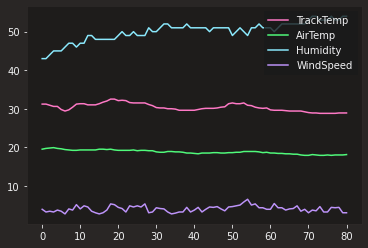

In [20]:
static_track_conditions(silverstone_p2)

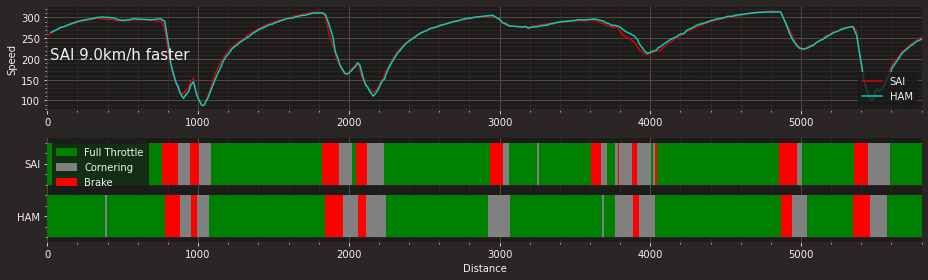

In [21]:
get_driver_aws_data("SAI","HAM", 0000, 5800, silverstone_p2)

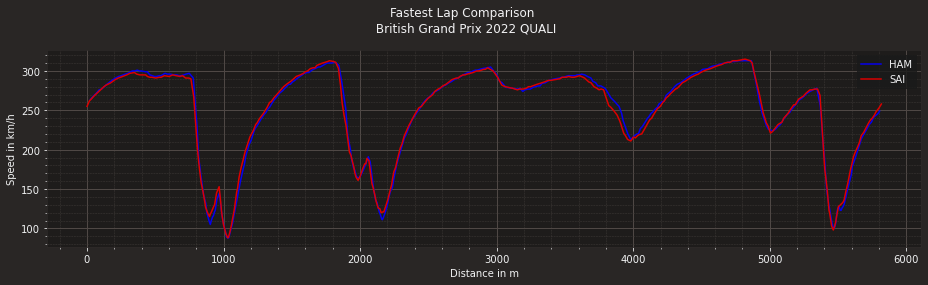

In [22]:
fastest_lap_comparison("HAM","SAI",silverstone_p2)

Same Team Color


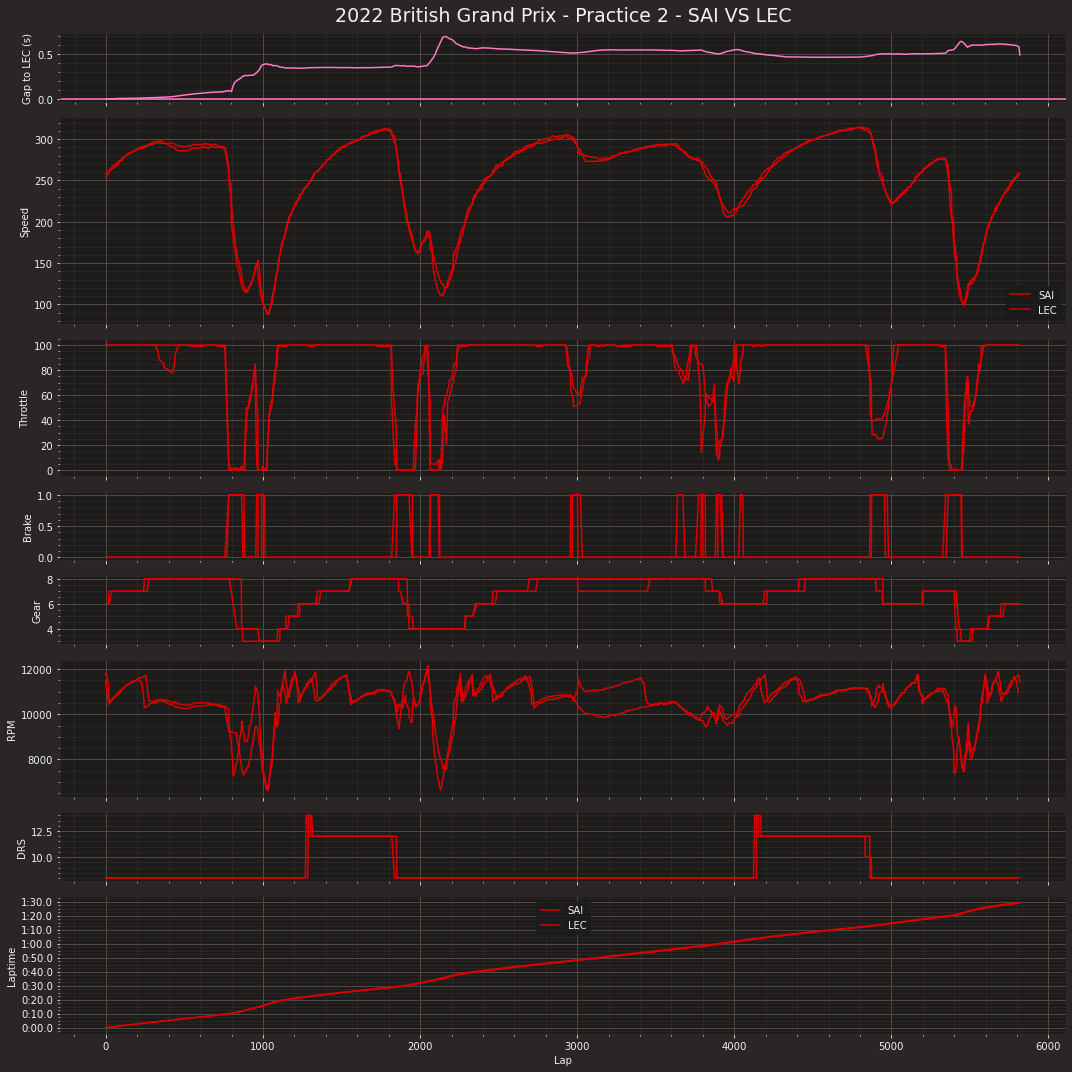

In [23]:
get_driver_lap_comparison("SAI","LEC", silverstone_p2)

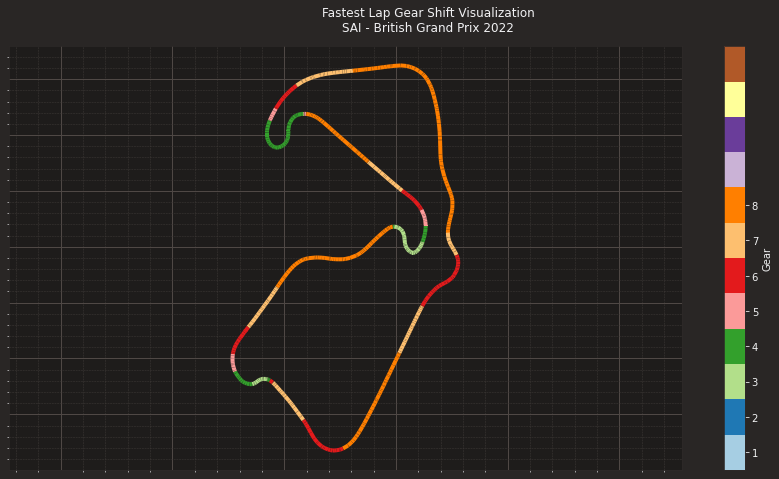

In [24]:
driver_gear_changes("SAI", silverstone_p2)

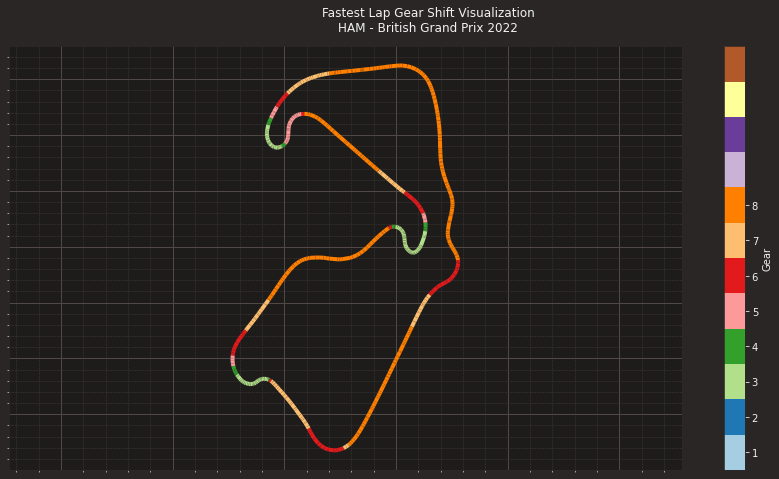

In [25]:
driver_gear_changes("HAM",silverstone_p2)

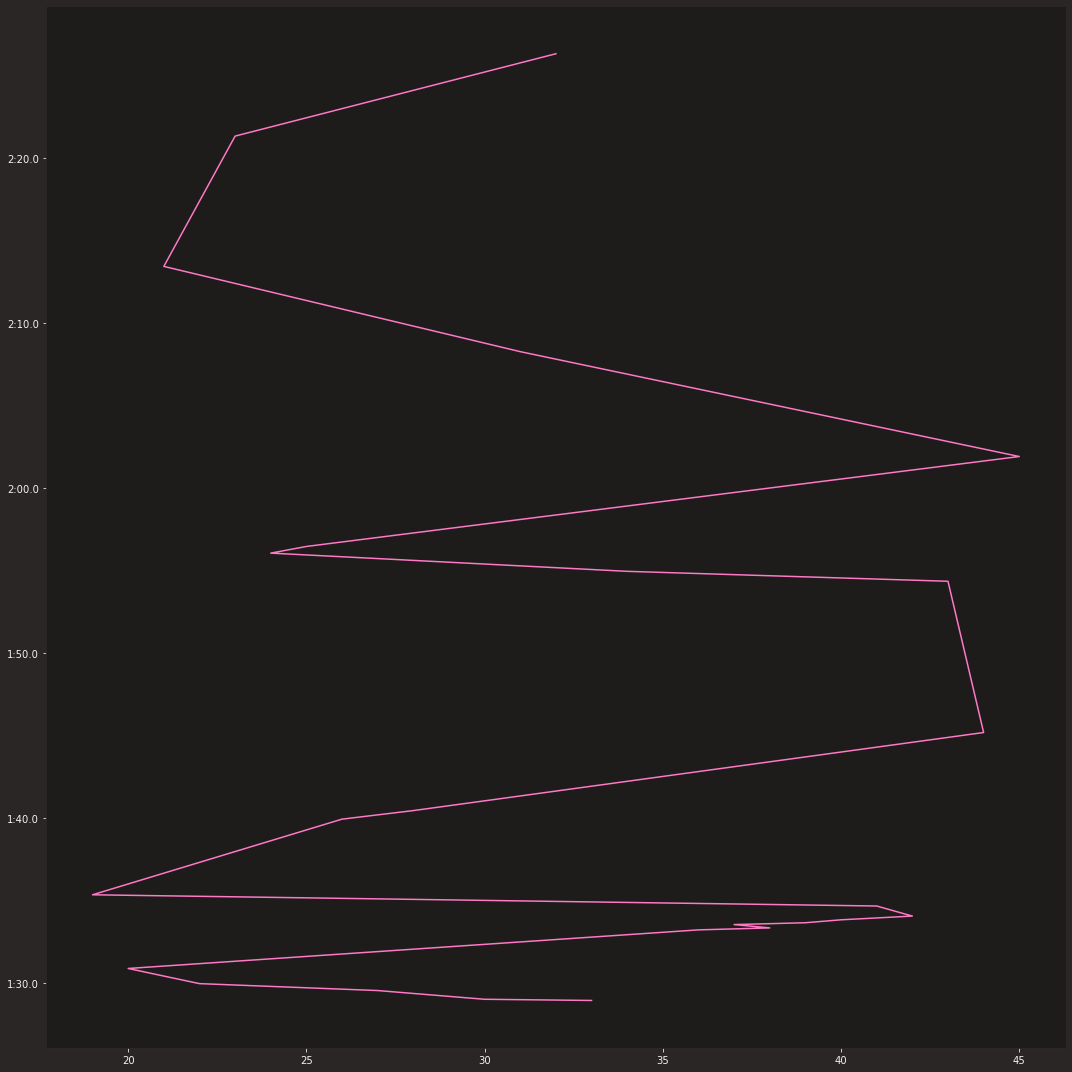

In [26]:
carlo_GP = carlo_GP['LapTime']

carlo_GP.plot()
pyplot.show()

In [27]:
carlo_GP

33   0 days 00:01:28.942000
30   0 days 00:01:29.014000
27   0 days 00:01:29.543000
22   0 days 00:01:29.962000
20   0 days 00:01:30.880000
36   0 days 00:01:33.219000
38   0 days 00:01:33.338000
37   0 days 00:01:33.539000
39   0 days 00:01:33.651000
40   0 days 00:01:33.829000
42   0 days 00:01:34.055000
41   0 days 00:01:34.665000
19   0 days 00:01:35.345000
26   0 days 00:01:39.928000
28   0 days 00:01:40.446000
44   0 days 00:01:45.176000
43   0 days 00:01:54.340000
34   0 days 00:01:54.942000
24   0 days 00:01:56.046000
25   0 days 00:01:56.449000
45   0 days 00:02:01.898000
31   0 days 00:02:08.252000
21   0 days 00:02:13.418000
23   0 days 00:02:21.312000
32   0 days 00:02:26.302000
18                      NaT
29                      NaT
35                      NaT
Name: LapTime, dtype: timedelta64[ns]

In [28]:



def get_driver_lap_comparison(driver1, driver2, session):
    
    '''This function is to take telementry data from each driver, and compare the respective
    lap times in regard to fastest lap time data.'''

    # Laps can now be accessed through the .laps object coming from the session
    laps_driver_1 = session.laps.pick_driver(driver1)
    laps_driver_2 = session.laps.pick_driver(driver2)

    # Select the fastest lap
    fastest_driver_1 = laps_driver_1.pick_fastest()
    fastest_driver_2 = laps_driver_2.pick_fastest()

    # Retrieve the telemetry and add the distance column
    telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
    telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

    # Make sure whe know the team name for coloring
    team_driver_1 = fastest_driver_1['Team']
    team_driver_2 = fastest_driver_2['Team']

    # extract delta time
    delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

    driver1_color = ff1.plotting.team_color(team_driver_1)
    driver2_color = ff1.plotting.team_color(team_driver_2)
    alt1_color = ff1.plotting.team_color("RBR")
    alt2_color = ff1.plotting.team_color("FER")


    plot_size = [15, 15]
    plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver1} VS {driver2}"
    #plot_ratios = [1, 3, 2, 1, 1, 2]
    plot_ratios = [1, 3, 2, 1, 1, 2, 1, 2]
    plot_filename = plot_title.replace(" ", "") + ".png"




    # Make plot a bit bigger
    plt.rcParams['figure.figsize'] = plot_size


    # Create subplots with different sizes
    #fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
    # Create subplots with different sizes which includes DRS data
    fig, ax = plt.subplots(8, gridspec_kw={'height_ratios': plot_ratios})


    # Set the plot title
    ax[0].title.set_text(plot_title)


    # Delta line
    ax[0].plot(ref_tel['Distance'], delta_time)
    ax[0].axhline(0)
    ax[0].set(ylabel=f"Gap to {driver2} (s)")

    # Speed trace
    ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver1, color=driver1_color)
    ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver2, color=driver2_color)
    ax[1].set(ylabel='Speed')
    ax[1].legend(loc="lower right")

    # Throttle trace
    ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver1, color=driver1_color)
    ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver2, color=driver2_color)
    ax[2].set(ylabel='Throttle')

    # Brake trace
    ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver1, color=driver1_color)
    ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver2, color=driver2_color)
    ax[3].set(ylabel='Brake')

    # Gear trace
    ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver1, color=driver1_color)
    ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver2, color=driver2_color)
    ax[4].set(ylabel='Gear')

    # RPM trace
    ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver1, color=driver1_color)
    ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver2, color=driver2_color)
    ax[5].set(ylabel='RPM')

    # DRS trace
    ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver1, color=driver1_color)
    ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver2, color=driver2_color)
    ax[6].set(ylabel='DRS')
    ax[6].set(xlabel='Lap distance (meters)')


    ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver1, color=driver1_color)
    ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver2, color=driver2_color)
    ax[7].set(ylabel='Laptime', xlabel='Lap')
    ax[7].legend(loc="upper center")


    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
        
    # Store figure
    plt.savefig(plot_filename, dpi=300)

# Would be nice to have a conditional statement that ensures the colours are not the same
    if driver1_color == driver2_color:
        print('Same Team Color')
        
        return(ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver1, color=driver1_color)).replace(driver1_color,alt1_color)
        return(ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver2, color=driver2_color)).replace(driver2_color,alt2_color)

        
    
    plt.show()  

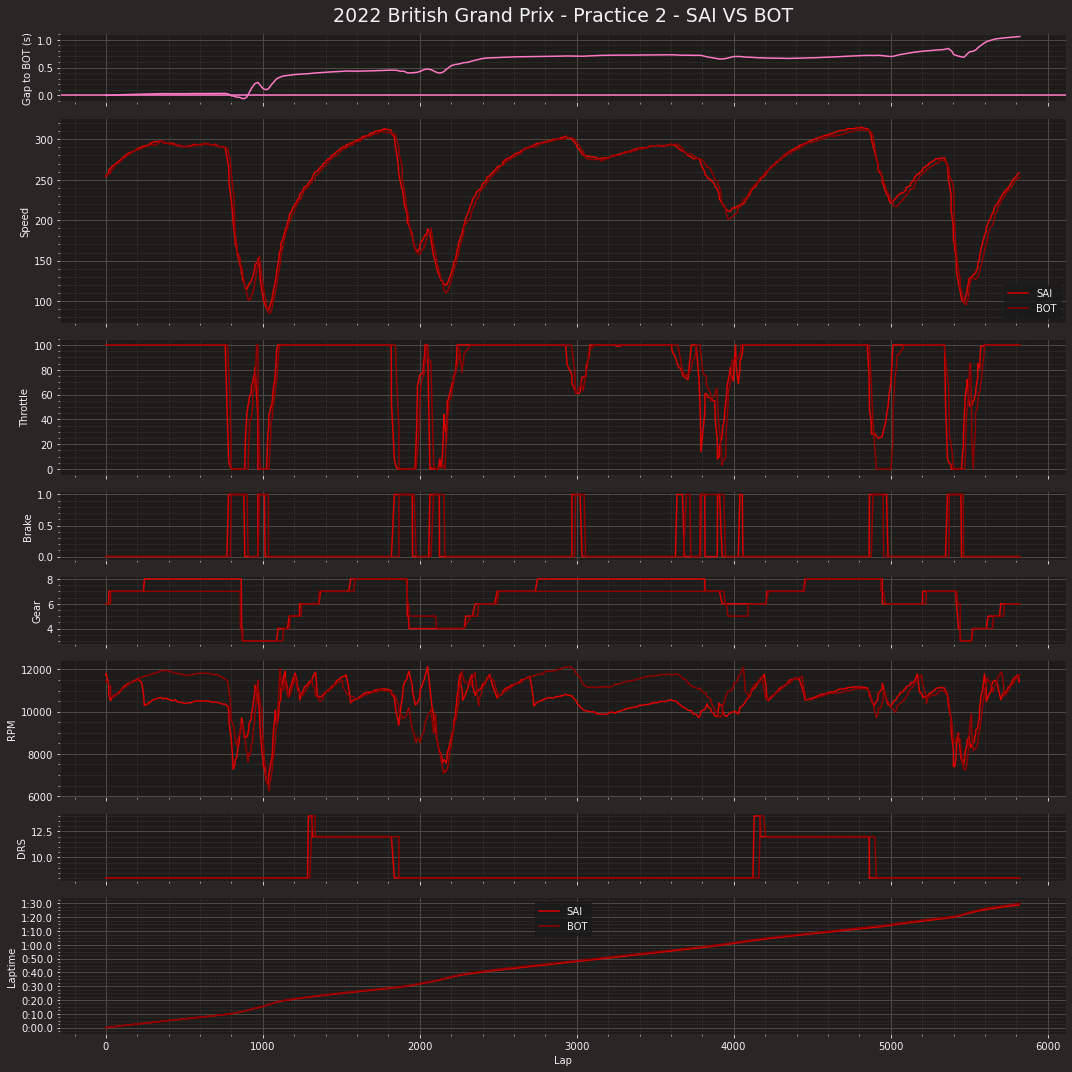

In [29]:
get_driver_lap_comparison("SAI","BOT", silverstone_p2)

In [30]:
silverstone_p2.laps

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:17:59.768000,1,NaT,1,1,0 days 00:15:59.232000,NaT,NaT,0 days 00:00:42.077000,0 days 00:00:49.528000,...,False,MEDIUM,1.0,True,0 days 00:15:59.232000,Red Bull Racing,VER,1,False,2022-07-01 15:00:59.243
1,0 days 00:19:31.206000,1,0 days 00:01:31.438000,2,1,NaT,NaT,0 days 00:00:29.099000,0 days 00:00:37.321000,0 days 00:00:25.018000,...,False,MEDIUM,2.0,True,0 days 00:17:59.768000,Red Bull Racing,VER,1,True,2022-07-01 15:02:59.779
2,0 days 00:21:48.612000,1,0 days 00:02:17.406000,3,1,NaT,NaT,0 days 00:00:41.436000,0 days 00:00:59.595000,0 days 00:00:36.375000,...,False,MEDIUM,3.0,True,0 days 00:19:31.206000,Red Bull Racing,VER,1,True,2022-07-01 15:04:31.217
3,0 days 00:23:49.500000,1,0 days 00:02:00.888000,4,1,NaT,NaT,0 days 00:00:36.274000,0 days 00:00:51.589000,0 days 00:00:33.025000,...,False,MEDIUM,4.0,True,0 days 00:21:48.612000,Red Bull Racing,VER,1,True,2022-07-01 15:06:48.623
4,0 days 00:25:19.988000,1,0 days 00:01:30.488000,5,1,NaT,NaT,0 days 00:00:29.079000,0 days 00:00:36.621000,0 days 00:00:24.788000,...,False,MEDIUM,5.0,True,0 days 00:23:49.500000,Red Bull Racing,VER,1,True,2022-07-01 15:08:49.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,0 days 01:12:52.195000,77,0 days 00:01:34.799000,25,5,NaT,NaT,0 days 00:00:30.274000,0 days 00:00:38.356000,0 days 00:00:26.169000,...,False,HARD,15.0,False,0 days 01:11:17.396000,Alfa Romeo,BOT,1,True,2022-07-01 15:56:17.407
467,0 days 01:14:27.352000,77,0 days 00:01:35.157000,26,5,NaT,NaT,0 days 00:00:30.266000,0 days 00:00:38.484000,0 days 00:00:26.407000,...,False,HARD,16.0,False,0 days 01:12:52.195000,Alfa Romeo,BOT,1,True,2022-07-01 15:57:52.206
468,0 days 01:16:02.611000,77,0 days 00:01:35.259000,27,5,NaT,NaT,0 days 00:00:30.481000,0 days 00:00:38.566000,0 days 00:00:26.212000,...,False,HARD,17.0,False,0 days 01:14:27.352000,Alfa Romeo,BOT,1,True,2022-07-01 15:59:27.363
469,0 days 01:18:07.742000,77,0 days 00:02:05.131000,28,5,NaT,NaT,0 days 00:00:35.803000,0 days 00:00:48.506000,0 days 00:00:40.822000,...,False,HARD,18.0,False,0 days 01:16:02.611000,Alfa Romeo,BOT,1,True,2022-07-01 16:01:02.622


In [31]:
drivers = pd.unique(silverstone_p2.laps['Driver'])
print(drivers)

list_fastest_laps = list()

for drv in drivers:
    drvs_fastest_lap = silverstone_p2.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    # plot is nicer to look at and more easily understandable if we just plot the time differences.
    #  Therefore we subtract the fastest lap time from all other lap times.
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

['VER' 'SAI' 'MSC' 'HAM' 'OCO' 'ZHO' 'ALB' 'TSU' 'MAG' 'STR' 'LEC' 'ALO'
 'PER' 'GAS' 'LAT' 'VET' 'NOR' 'RIC' 'RUS' 'BOT']


In [32]:
tyrelife = pd.unique(silverstone_p2.laps['TyreLife'])
for d in tyrelife:
    print(d)


1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
nan
13.0
12.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0


In [33]:
tyrelife

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan, 13.,
       12., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

### Qualifying Data Analysis below:



In [34]:
quali_silverstone = main(2022, "British", "Q")

core           INFO 	Loading data for British Grand Prix - Qualifying [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '11', '44', '4', '14', '63', '24', '6', '10', '77', '22', '3', '31', '23', '20', '5', '47', '18']


['SAI' 'VER' 'LEC' 'PER' 'HAM' 'NOR' 'ALO' 'RUS' 'ZHO' 'LAT' 'GAS' 'BOT'
 'TSU' 'RIC' 'OCO' 'ALB' 'MAG' 'VET' 'MSC' 'STR']


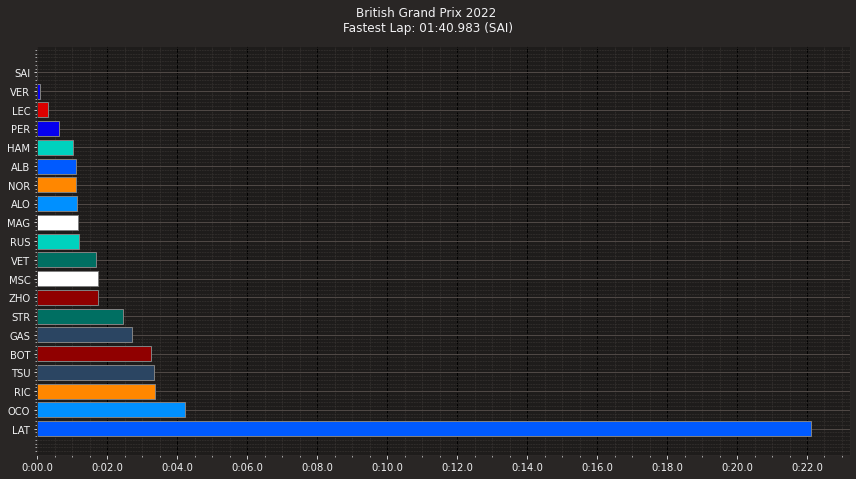

In [35]:
fastest_laptimes(quali_silverstone)

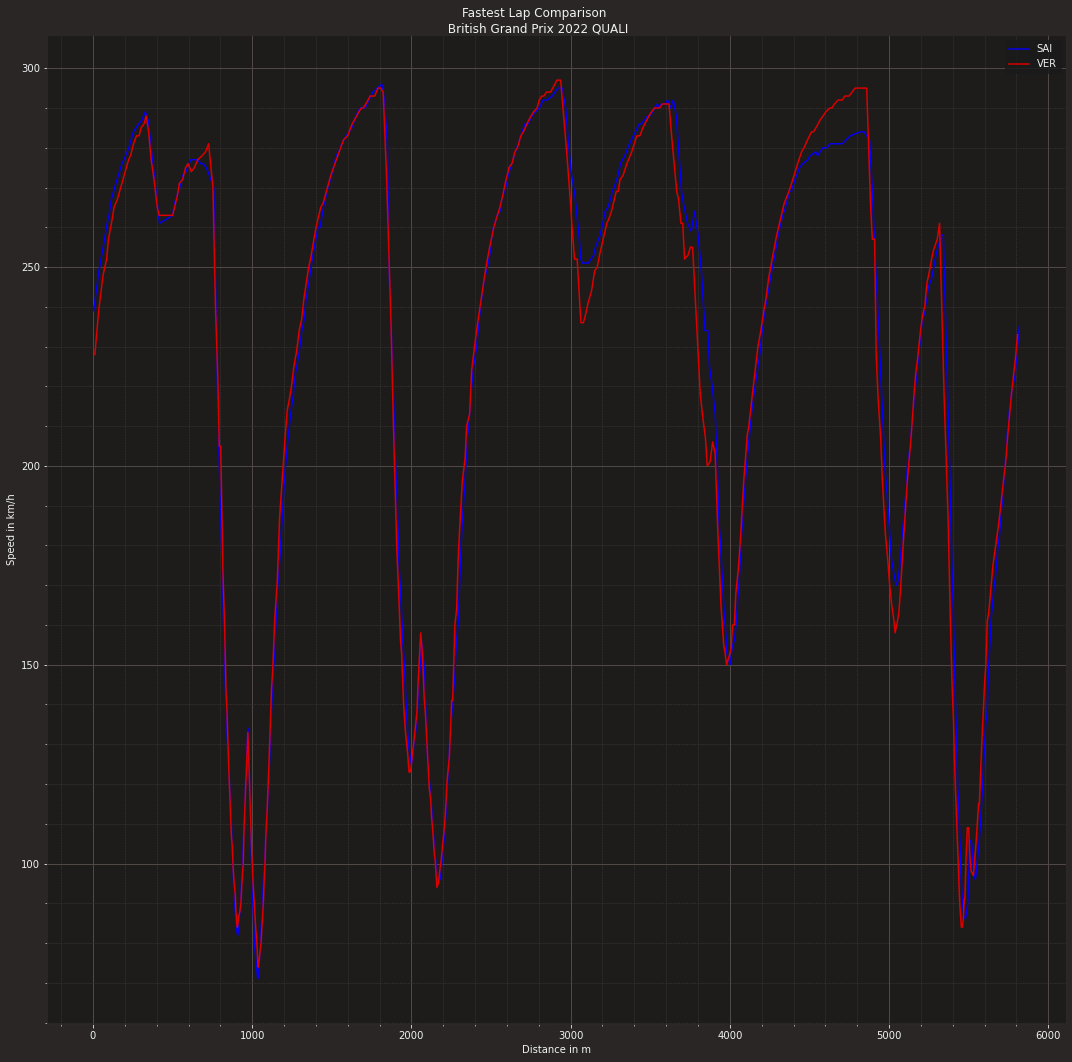

None
None


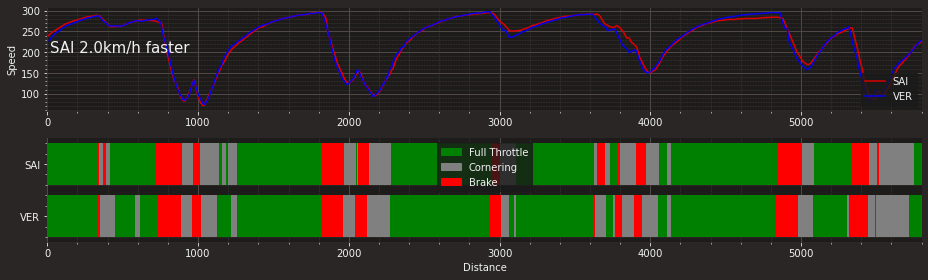

In [39]:
print(fastest_lap_comparison("SAI","VER", quali_silverstone))
print(get_driver_aws_data("SAI","VER",0,5800, quali_silverstone))

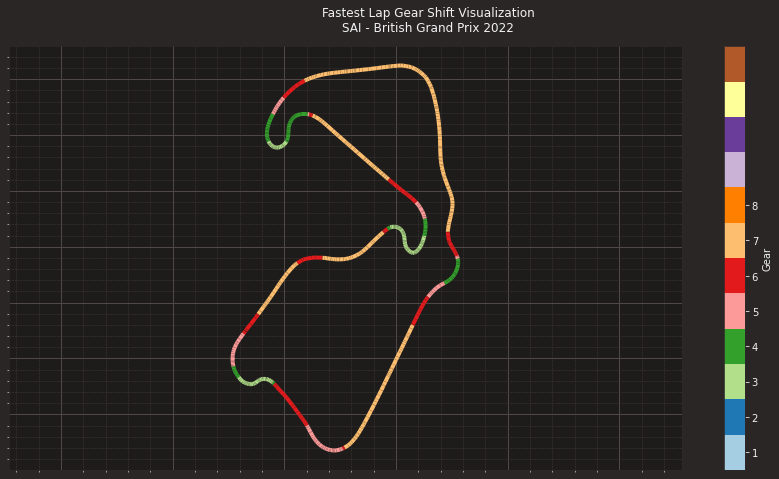

In [40]:
driver_gear_changes("SAI", quali_silverstone)

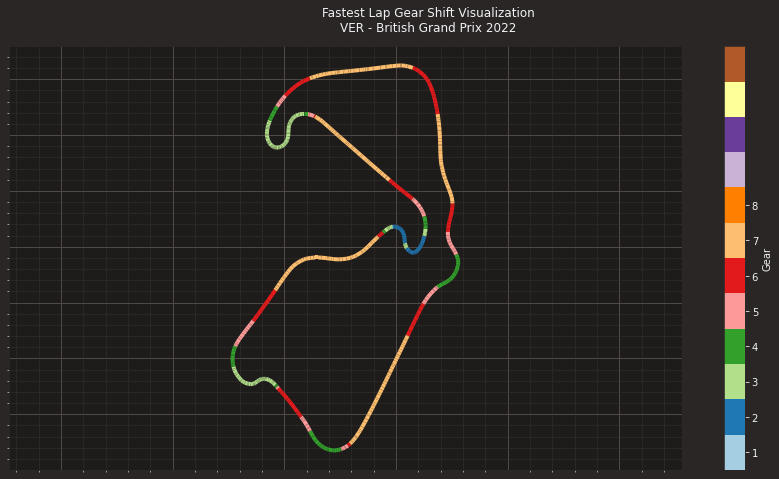

In [44]:
driver_gear_changes("VER",quali_silverstone)

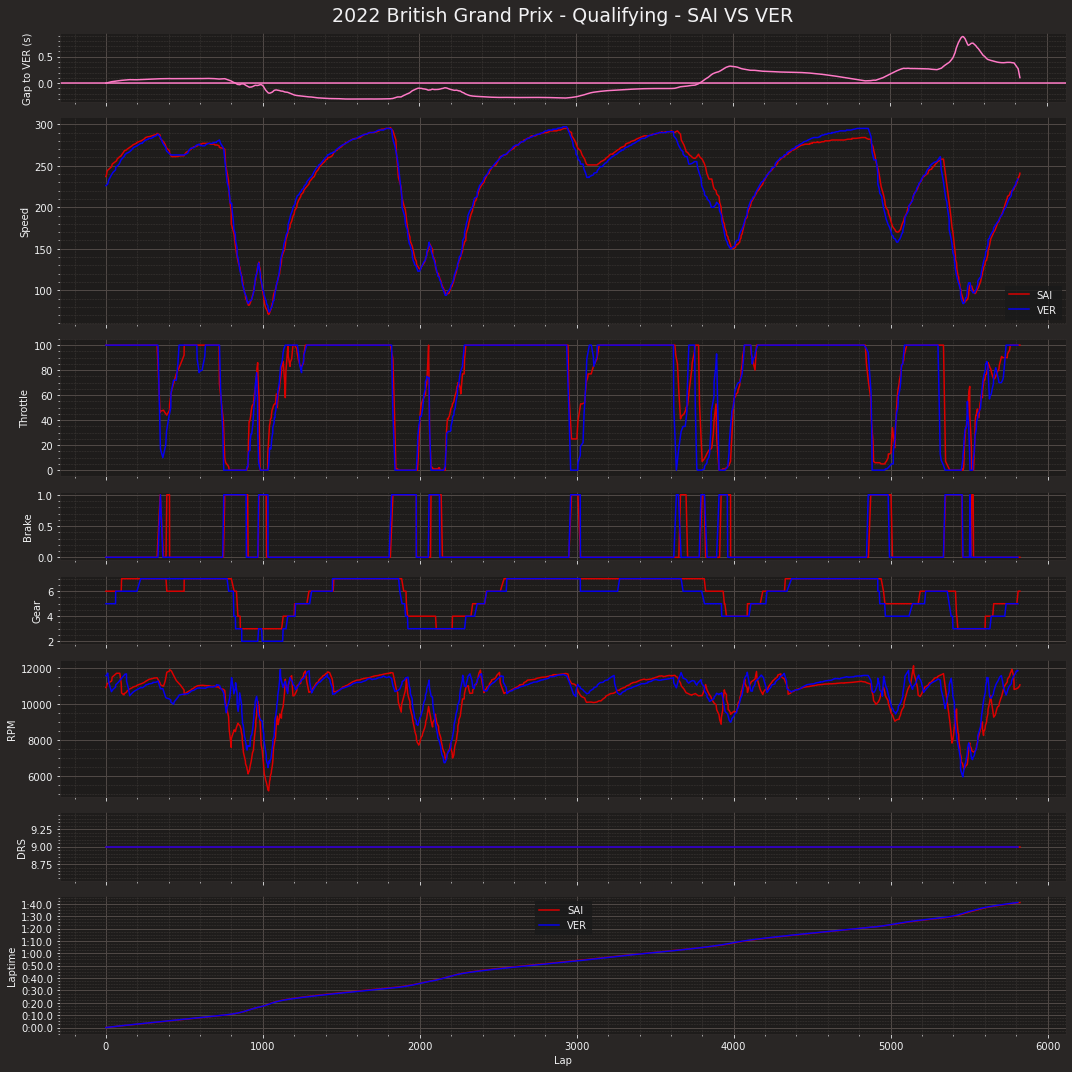

In [41]:
get_driver_lap_comparison("SAI","VER", quali_silverstone)

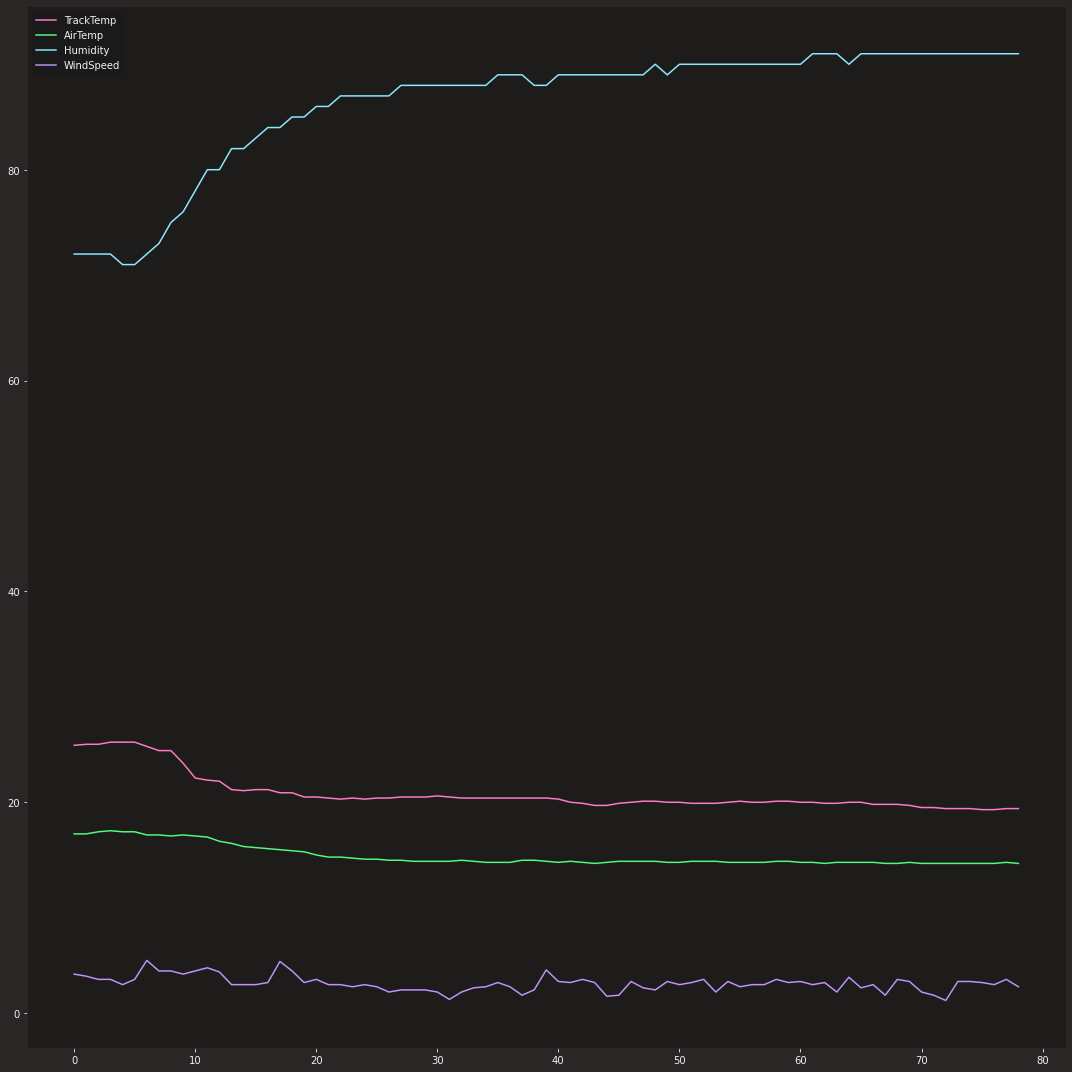

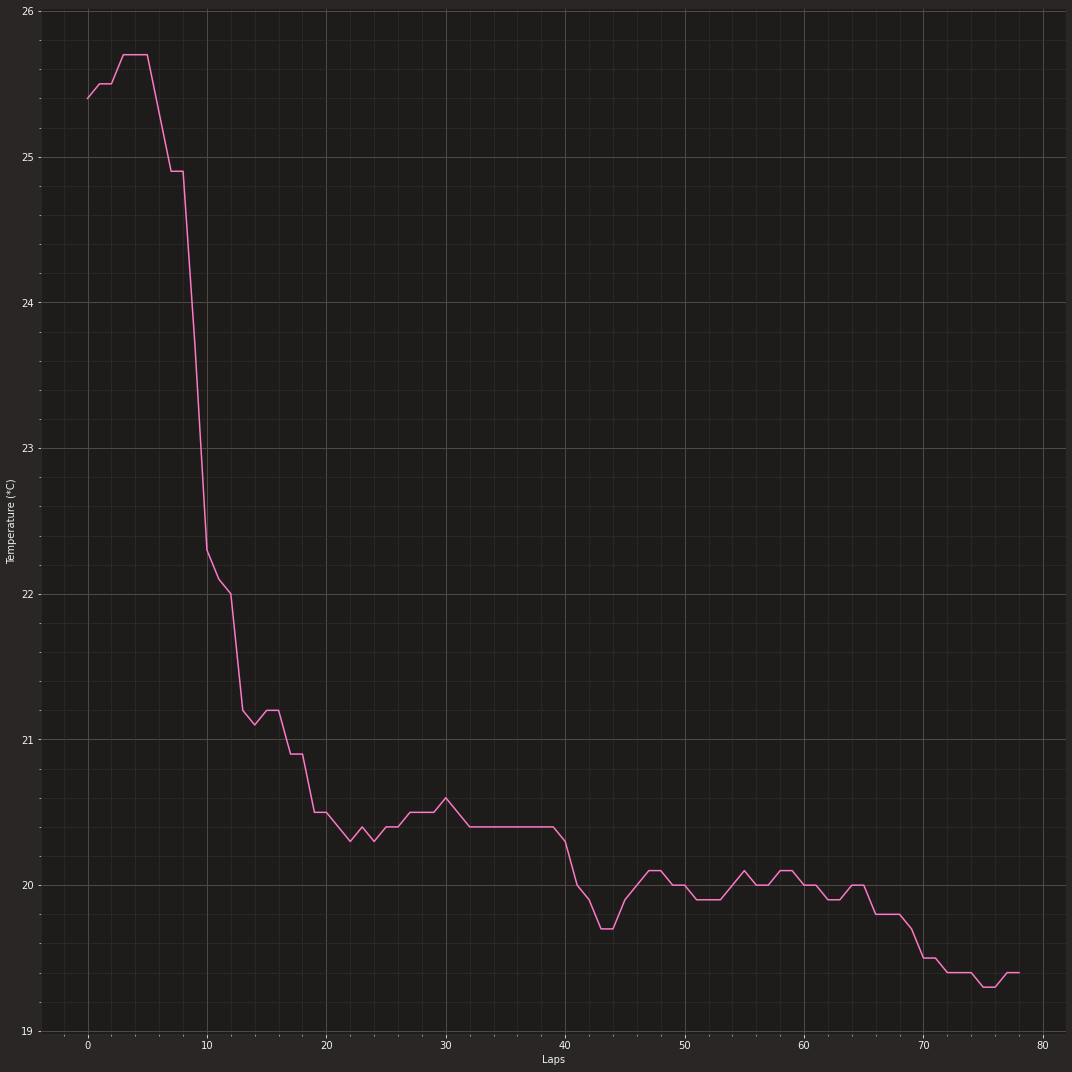

In [43]:
static_track_conditions(quali_silverstone)
static_track_temp(quali_silverstone)